# Exploring the "IMDb 5000+ Movies & Multiple Genres Dataset" dataset

Last week's dataset has only 437 instances. After working on it, we have observed that not only is the number of instances too low (thus any ML model is prone to overfitting it), but also the dataset is very clean, hence we will not have the chance to practice topics like feature selection and data cleaning.

For these reasons, we decided to choose another dataset that is larger (and less clean). 

## Load the Data

In [3]:
import os
import pandas as pd
import urllib.request
import requests

def load_movies_dataset():
    github_url = "https://raw.githubusercontent.com/dmml-heriot-watt/group-coursework-ha/rami-branch/data/IMDb_All_Genres_etf_clean1.csv?token=GHSAT0AAAAAACH2S323FOHPEL62IUYUCMYIZI5GWGA"
    requests.get(github_url)
    return pd.read_csv(github_url)

In [5]:
movies = load_movies_dataset()
movies

Movie_Title  Year  \
0                                           Kantara  2022   
1                                   The Dark Knight  2008   
2     The Lord of the Rings: The Return of the King  2003   
3                                         Inception  2010   
4             The Lord of the Rings: The Two Towers  2002   
...                                             ...   ...   
5557                                 Disaster Movie  2008   
5558                        The Hottie & the Nottie  2008   
5559                           From Justin to Kelly  2003   
5560                   Superbabies: Baby Geniuses 2  2004   
5561                 Cumali Ceber: Allah Seni Alsin  2017   

                                      Director  \
0                                Rishab Shetty   
1                            Christopher Nolan   
2                                Peter Jackson   
3                            Christopher Nolan   
4                                Peter Jackson   
...                                        ...   
5557  Directors:Jason Friedberg, Aaron Seltzer   
5558                                Tom Putnam   
5559                             Robert Iscove   
5560                                 Bob Clark   
5561                                Gökhan Gök   

                                                 Actors  Rating  \
0     Rishab Shetty, Sapthami Gowda, Kishore Kumar G...     9.3   
1     Christian Bale, Heath Ledger, Aaron Eckhart, M...     9.0   
2     Elijah Wood, Viggo Mortensen, Ian McKellen, Or...     9.0   
3     Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...     8.8   
4     Elijah Wood, Ian McKellen, Viggo Mortensen, Or...     8.8   
...                                                 ...     ...   
5557  Carmen Electra, Vanessa Lachey, Nicole Parker,...     1.9   
5558  Paris Hilton, Joel David Moore, Christine Laki...     1.9   
5559  Kelly Clarkson, Justin Guarini, Katherine Bail...     1.9   
5560  Jon Voight, Scott Baio, Vanessa Angel, Skyler ...     1.5   
5561  Halil Söyletmez, Doga Konakoglu, Emre Keskin, ...     1.0   

      Runtime(Mins)     Censor   Total_Gross main_genre           side_genre  
0               148         UA  Gross Unkown     Action    Adventure,  Drama  
1               152         UA      $534.86M     Action        Crime,  Drama  
2               201          U      $377.85M     Action    Adventure,  Drama  
3               148         UA      $292.58M     Action   Adventure,  Sci-Fi  
4               179         UA      $342.55M     Action    Adventure,  Drama  
...             ...        ...           ...        ...                  ...  
5557             87      PG-13       $14.19M     Comedy               Sci-Fi  
5558             91      PG-13        $0.03M     Comedy              Romance  
5559             81         PG        $4.92M     Comedy    Musical,  Romance  
5560             88         PG        $9.11M     Comedy      Family,  Sci-Fi  
5561            100  Not Rated  Gross Unkown     Comedy               Comedy  

[5562 rows x 10 columns]

In [6]:
movies.head()

Movie_Title  Year           Director  \
0                                        Kantara  2022      Rishab Shetty   
1                                The Dark Knight  2008  Christopher Nolan   
2  The Lord of the Rings: The Return of the King  2003      Peter Jackson   
3                                      Inception  2010  Christopher Nolan   
4          The Lord of the Rings: The Two Towers  2002      Peter Jackson   

                                              Actors  Rating  Runtime(Mins)  \
0  Rishab Shetty, Sapthami Gowda, Kishore Kumar G...     9.3            148   
1  Christian Bale, Heath Ledger, Aaron Eckhart, M...     9.0            152   
2  Elijah Wood, Viggo Mortensen, Ian McKellen, Or...     9.0            201   
3  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...     8.8            148   
4  Elijah Wood, Ian McKellen, Viggo Mortensen, Or...     8.8            179   

  Censor   Total_Gross main_genre           side_genre  
0     UA  Gross Unkown     Action    Adventure,  Drama  
1     UA      $534.86M     Action        Crime,  Drama  
2      U      $377.85M     Action    Adventure,  Drama  
3     UA      $292.58M     Action   Adventure,  Sci-Fi  
4     UA      $342.55M     Action    Adventure,  Drama

Get a quick description of the dataset:

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


There are 5,562 instances in the dataset and we can notice that no row is missing from any attribute. Let us explore the non-numerical attributes. These can be divided into two types: categorical and non-categorical.

<b>We will use regression models to predict the "Total_Gross" label.</b>

Explore the categorical, non-numerical attributes:

In [9]:
movies["Censor"].value_counts()

UA           1118
A            1101
U            1023
R             926
Not Rated     495
PG-13         405
18            136
PG            120
16             71
13             53
UA 16+         22
15+            18
7              17
UA 13+         12
G               9
(Banned)        8
UA 7+           7
12+             5
All             5
Unrated         4
U/A             2
18+             2
12              1
M/PG            1
NC-17           1
Name: Censor, dtype: int64

In [10]:
movies["main_genre"].value_counts()

Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: main_genre, dtype: int64

In [11]:
movies["side_genre"].value_counts()

 Drama,  Romance       324
 Drama                 312
 Adventure,  Comedy    307
 Crime,  Drama         306
 Romance               305
                      ... 
 History,  Mystery       1
 Fantasy,  History       1
 History,  Sport         1
 Action,  Comedy         1
 Fantasy,  Musical       1
Name: side_genre, Length: 144, dtype: int64

Explore the non-categorical, non-numerical attributes:

In [12]:
movies["Movie_Title"].value_counts()

Cinderella                        3
Taxi                              3
Dracula                           3
Robin Hood                        3
The Thing                         2
                                 ..
Mank                              1
The Iceman                        1
Bleed for This                    1
Bernie                            1
Cumali Ceber: Allah Seni Alsin    1
Name: Movie_Title, Length: 5453, dtype: int64

Note that we have to eventually be careful about selecting only "unique" movie titles.

In [13]:
movies["Director"].value_counts()

Cinderella                        3
Taxi                              3
Dracula                           3
Robin Hood                        3
The Thing                         2
                                 ..
Mank                              1
The Iceman                        1
Bleed for This                    1
Bernie                            1
Cumali Ceber: Allah Seni Alsin    1
Name: Movie_Title, Length: 5453, dtype: int64

In [14]:
movies["Actors"].value_counts()

William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan       6
Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers          4
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving    3
Patrick Stewart, Jonathan Frakes, Brent Spiner, LeVar Burton        3
Renée Zellweger, Colin Firth, Hugh Grant, Gemma Jones               2
                                                                   ..
Robert Redford, Casey Affleck, Sissy Spacek, Danny Glover           1
Maggie Smith, Alex Jennings, Jim Broadbent, Clare Hammond           1
Emma Stone, Steve Carell, Andrea Riseborough, Sarah Silverman       1
Warren Beatty, Annette Bening, Harvey Keitel, Ben Kingsley          1
Halil Söyletmez, Doga Konakoglu, Emre Keskin, Ceyda Saltadal        1
Name: Actors, Length: 5511, dtype: int64

The 'Movie_Title' attribute will probably not affect the prediction of the target value. On the other hand, the director's name the actors' name DO contribute to the prediction. Therefore, we will have to figure out how to handle them and let the ML models understand them.

Let us get a statistical description of the dataset

In [15]:
movies.describe()

Year       Rating  Runtime(Mins)
count  5562.000000  5562.000000    5562.000000
mean   2002.792521     6.755861     112.226717
std      16.143990     0.937133      21.612655
min    1920.000000     1.000000      45.000000
25%    1997.000000     6.200000      97.000000
50%    2007.000000     6.800000     108.000000
75%    2014.000000     7.400000     123.000000
max    2022.000000     9.300000     321.000000

The count/mean/std/... of the "Year" attribute are irrelevant. It is worth noting that the mean rating is ~6.755861 and the mean runtime(minutes) is ~112.226717.

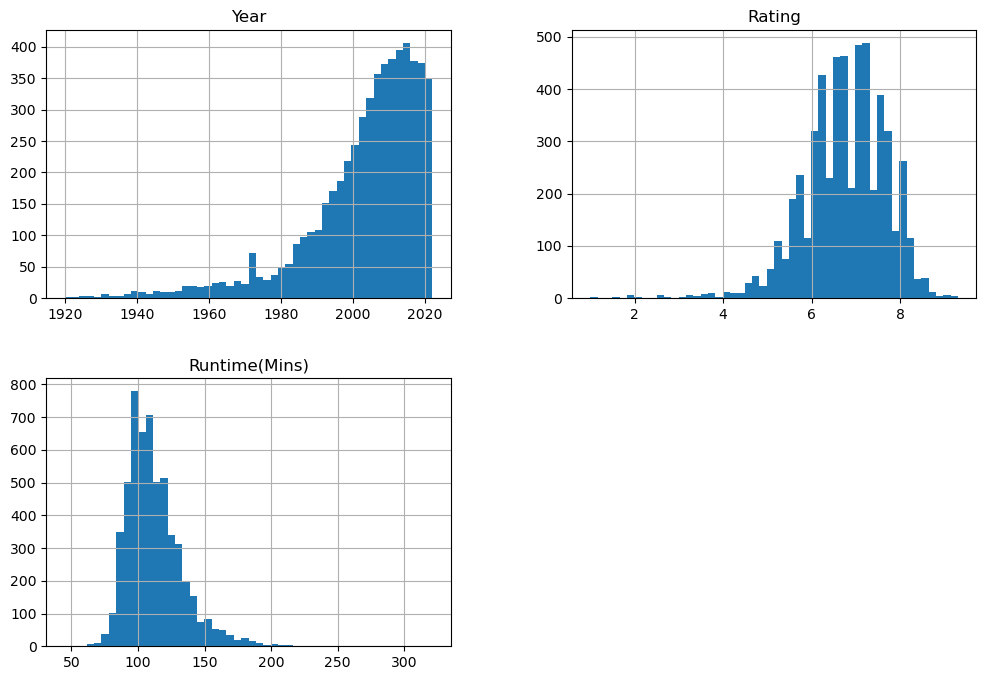

In [16]:
import matplotlib.pyplot as plt
movies.hist(bins=50, figsize=(12, 8))
plt.show()

The "Rating" and the "Runtime(Mins)" attributes are not skewed, so that will be helpful for our ML models. 

Let us explore the "Total_Gross" attribute: the label we are trying to predict.

In [17]:
movies["Total_Gross"].head()

0    Gross Unkown
1        $534.86M
2        $377.85M
3        $292.58M
4        $342.55M
Name: Total_Gross, dtype: object

In [18]:
movies["Total_Gross"].value_counts()

Gross Unkown    861
$0.01M           25
$0.02M           22
$0.04M           22
$0.03M           21
               ... 
$1.13M            1
$28.87M           1
$21.08M           1
$44.18M           1
$9.11M            1
Name: Total_Gross, Length: 3501, dtype: int64

Let us think of the target label: the "Total_Gross" attribute. 

We will use a decision tree to answer our regression problem. But, first, we have to handle the non-numeric attribute "Total_Gross" (which is our target label).

We can notice the following:
- The values of this column has the following format "$X.YZM". 
- There are 861 entries with the value "Gross Unknown".

Let us use Pandas and a Lambda function to convert the format to a float if the total gross is known and to convert that value to np.nan if the total gross = "Gross Unknown".

In [19]:
import numpy as np
movies["Total_Gross"] = movies["Total_Gross"].apply(lambda x: float(x.replace("$","").replace("M",""))*1000000 if x!="Gross Unkown" else np.nan )

Let us drop NANs:

In [20]:
movies.dropna(subset=["Total_Gross"], inplace=True)

Let us double-check that the changes have been applied:

In [21]:
movies["Total_Gross"].head()

1    534860000.0
2    377850000.0
3    292580000.0
4    342550000.0
5    315540000.0
Name: Total_Gross, dtype: float64

In [22]:
movies["Total_Gross"].value_counts()

10000.0       25
40000.0       22
20000.0       22
30000.0       21
50000.0       18
              ..
28870000.0     1
21080000.0     1
44180000.0     1
2420000.0      1
9110000.0      1
Name: Total_Gross, Length: 3500, dtype: int64

Our target label looks greate and clean!

## Create a Test Set and a Train Set

To train our model, and test its predictions, we will create a test set and a train set:

In [23]:
from sklearn.model_selection import train_test_split
train_test, test_test = train_test_split(movies, test_size=0.2, random_state=42)

## Data Visualization

Now that we have a train_set, we can start visualizing our data on that set. We should avoid touching the test_set at this stage. 

We start by making a copy of the train_test set:

In [24]:
movies = train_test.copy()

In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 4440 to 1018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    3760 non-null   object 
 1   Year           3760 non-null   int64  
 2   Director       3760 non-null   object 
 3   Actors         3760 non-null   object 
 4   Rating         3760 non-null   float64
 5   Runtime(Mins)  3760 non-null   int64  
 6   Censor         3760 non-null   object 
 7   Total_Gross    3760 non-null   float64
 8   main_genre     3760 non-null   object 
 9   side_genre     3760 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 323.1+ KB


Let us plot the "Rating" distribution:

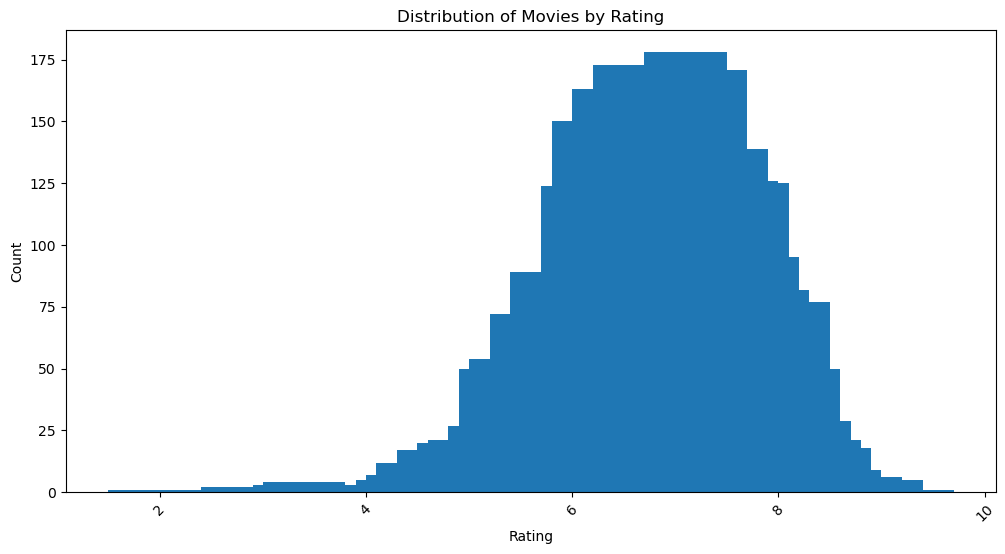

In [26]:
rating_counts = movies["Rating"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Apparently most movies range between [6.5,7.5]. Moreover, we should not blindly assume that highly rated movies [8.5-9.5] had a better performance at the Box Office (*The Shawshank Redemption*, the highest rated film on IMDb, didn't perform exceptionally well in terms of revenue) 

Let us plot the "Main_Genre" distribution:

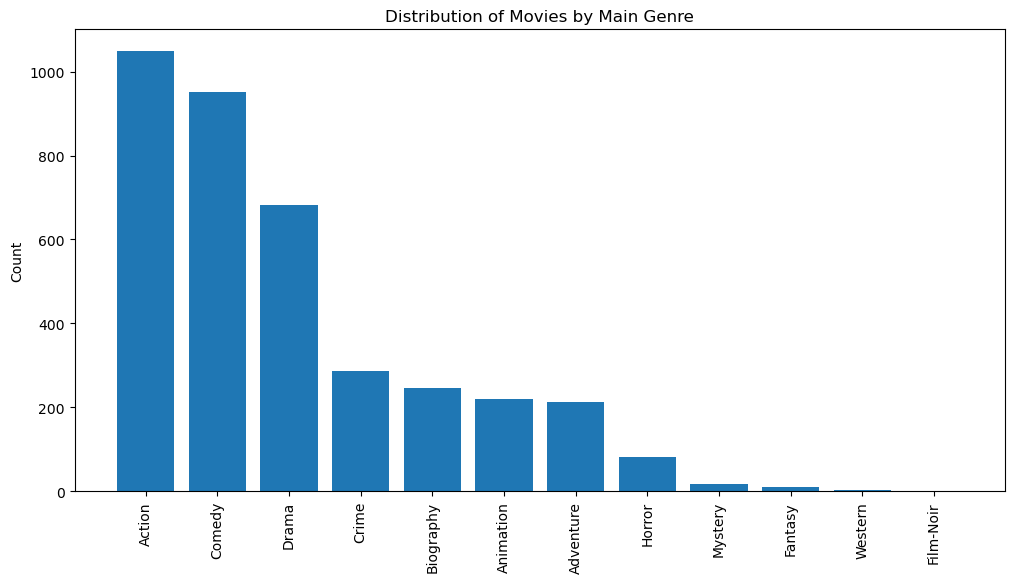

In [27]:
main_genre_counts = movies["main_genre"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(main_genre_counts.index, main_genre_counts.values)
plt.title("Distribution of Movies by Main Genre")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

*Action* movies generally have high revenue, but it is interesting to see how the rarity of *fantasy* movies in the dataset will affect our models prediction capabilites, since they also tend to perform well. The low frequency of the *fantasy* genery could also be because not many movies have it as their main genre (*Avatar* and *Star Wars* are two examples).

Let us plot the "side_genre" distribution:

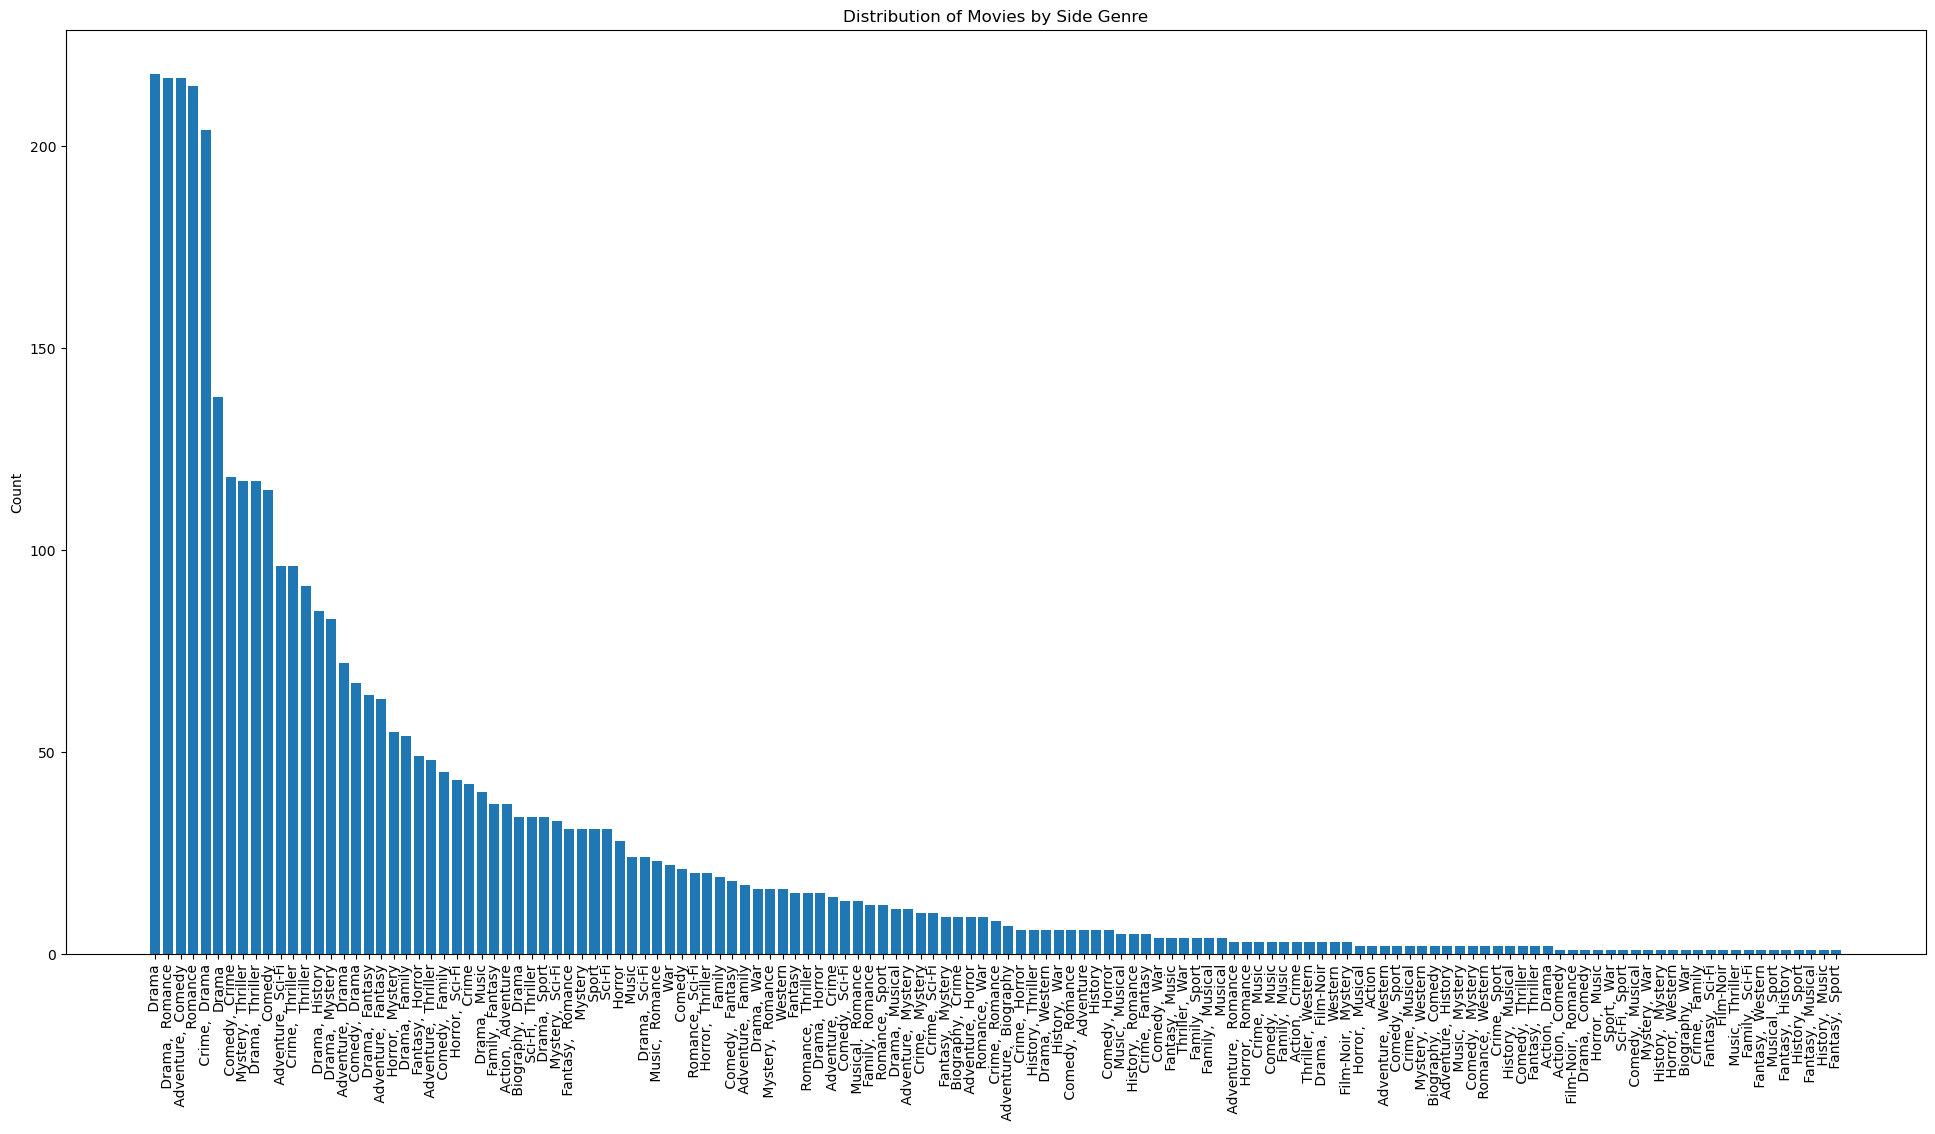

In [31]:
side_genre_counts = movies["side_genre"].value_counts()
plt.figure(figsize=(24, 12))
plt.bar(side_genre_counts.index, side_genre_counts.values)
plt.title("Distribution of Movies by Side Genre")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

Observe that the two combinations: </br>
   1.  *Drama* and *Fantasy* </br>
   2.  *Fantasy* and *Adventure* </br>
are frequent, despite the rarity of *Fantasy* as a main genre.

Now, let us get some statistical information about the target label: the "Total_Gross".

In [32]:
movies["Total_Gross"].describe()

count    3.760000e+03
mean     5.298575e+07
std      7.588182e+07
min      0.000000e+00
25%      6.905000e+06
50%      3.059500e+07
75%      6.697000e+07
max      9.366600e+08
Name: Total_Gross, dtype: float64

* The mean is 52.(something)
* The standard deviation > mean, so the data is widely spread

Let us do more data visualization to compare our target label with other labels. This will help us form an intuition of which labels are important in predict our target label. The best kind of graphs to do this is a scatter plot; it will also help us identify outliers.

Scatter plot: Year vs. Total_Gross

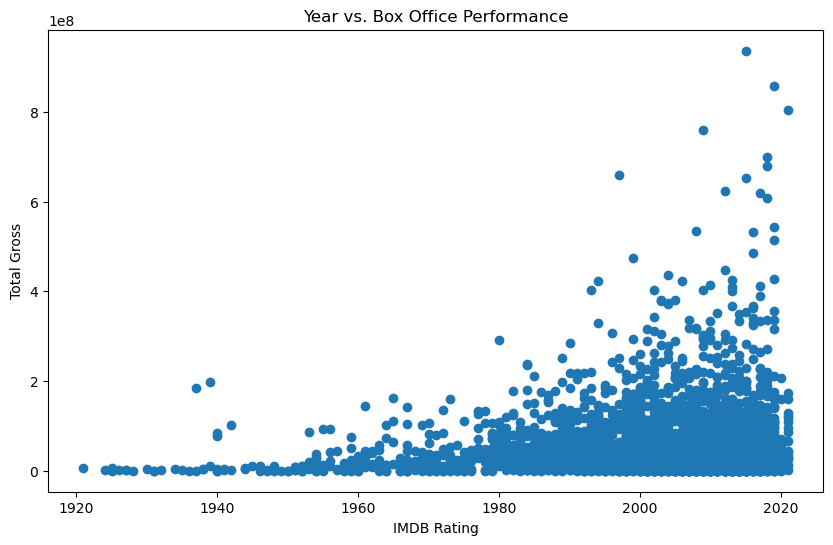

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Year"], movies["Total_Gross"])
plt.title("Year vs. Box Office Performance")
plt.xlabel("IMDB Rating")
plt.ylabel("Total Gross")
plt.show()

In 1930-1940 there are some outliers that performed well, especially if we could have our dataset adjusted for inflation.

Scatter Plot: Runtime(Mins) vs.Total_Gross 

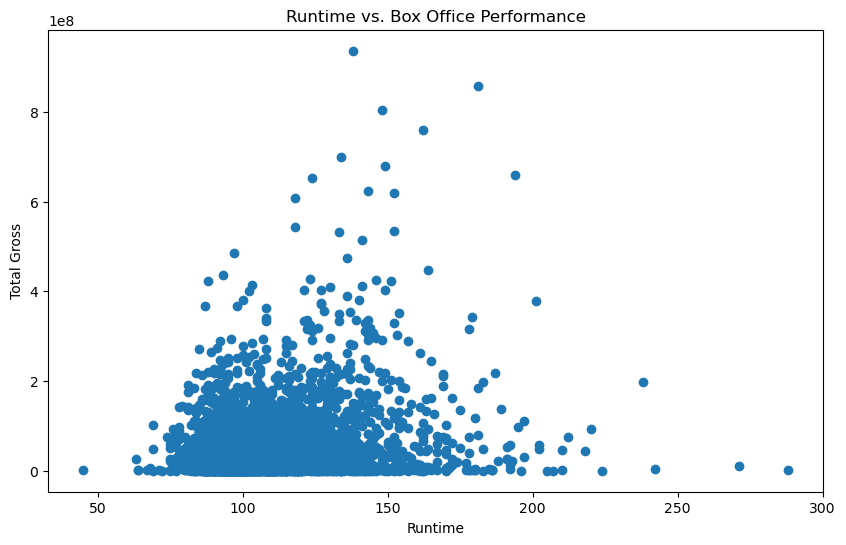

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Runtime(Mins)"], movies["Total_Gross"])
plt.title("Runtime vs. Box Office Performance")
plt.xlabel("Runtime")
plt.ylabel("Total Gross")
plt.show()

These are some interesting outliers that achieved a high total gross:

- ~180 minutes 
- ~200 minutes 
- ~140 minutes 

On the other hand, these are some interesting outliers that achieved a low total gross:
- ~45 minutes
- ~240 minutes
- ~270 minutes 
- ~290 minutes

Scatter Plot: Censor vs Total_Gross

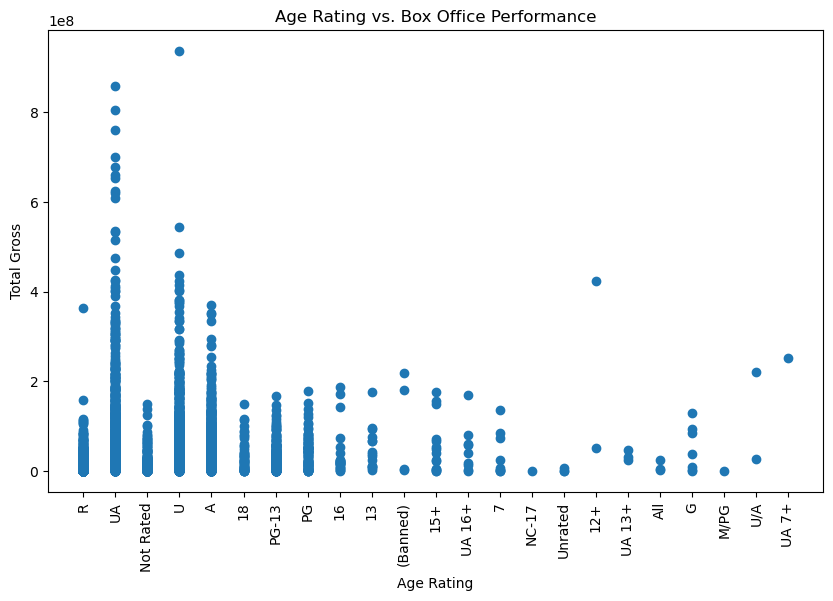

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(movies["Censor"], movies["Total_Gross"])
plt.title("Age Rating vs. Box Office Performance")
plt.xlabel("Age Rating")
plt.xticks(rotation=90)
plt.ylabel("Total Gross")
plt.show()

We note that following outliers:
- A movie rated *U* that performed well
- A movie rated *R* that performed well
- A movie rated *+12* that performed well
- Some *banned* movies that performed well compared to other in the same category

## Looking for Correlations

Let us get the correlation matrix:

In [38]:
corr_matrix = movies.corr()

C:\Users\Rami\AppData\Local\Temp\ipykernel_28032\3394929158.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movies.corr()


The correlation matrix can help us find out how much each attribute correlates with the "Total_Gross" attribute. The closer the value to 1 is, the more it is related to Total_Gross.

In [39]:
corr_matrix["Total_Gross"].sort_values(ascending=False)

Total_Gross      1.000000
Runtime(Mins)    0.172305
Year             0.100929
Rating           0.072403
Name: Total_Gross, dtype: float64

Let us plot the scatter matrix:

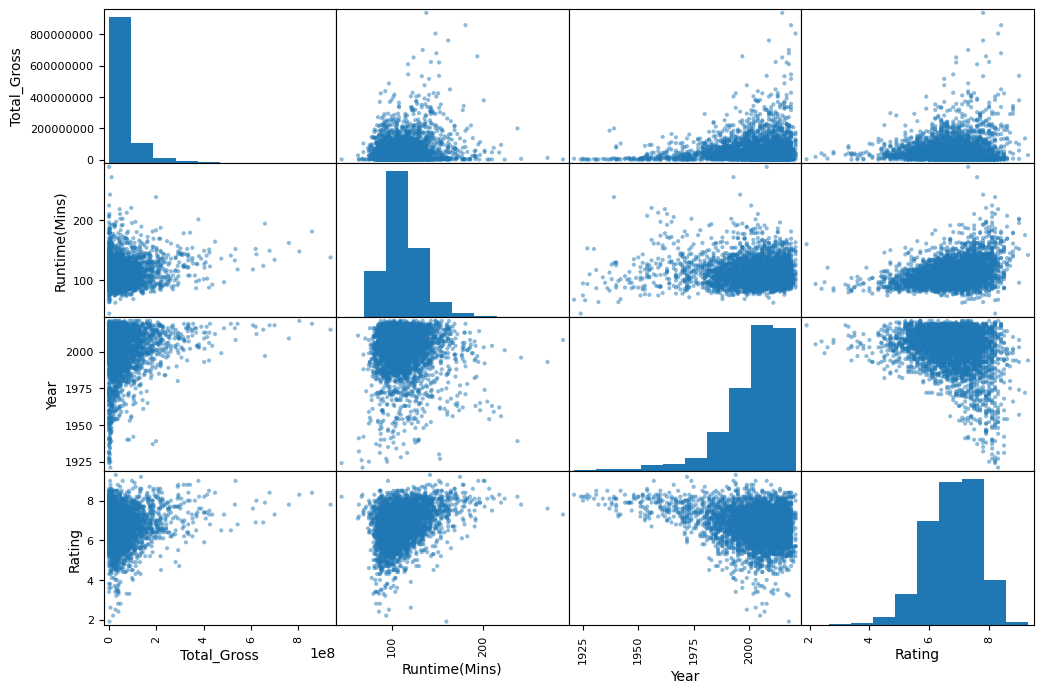

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["Total_Gross", "Runtime(Mins)", "Year", "Rating"]
scatter_matrix(movies[attributes], figsize=(12, 8))
plt.show()

The most promising attribute to predict the Total_Gross from the numerical attributs is the Runtime(Mins).

## Prepare the Data for ML

Let us revert to a clean training set and separate predictors and the labels.


In [42]:
movies = train_test.drop("Total_Gross", axis=1)
movies_labels = train_test["Total_Gross"].copy()

## Data Cleaning

Let us handle text attributes.

In [44]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 4440 to 1018
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    3760 non-null   object 
 1   Year           3760 non-null   int64  
 2   Director       3760 non-null   object 
 3   Actors         3760 non-null   object 
 4   Rating         3760 non-null   float64
 5   Runtime(Mins)  3760 non-null   int64  
 6   Censor         3760 non-null   object 
 7   main_genre     3760 non-null   object 
 8   side_genre     3760 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 293.8+ KB


We start by handling categorical attributes:

In [45]:
movies_cat = movies[["Movie_Title","Director", "Actors", "Censor", "main_genre", "side_genre"]]
movies_cat.head(10)

Movie_Title  \
4440                           Burnt   
1676                            Blow   
3908                    Dear Zindagi   
2210                           Shane   
4141                     The Lobster   
964   Maze Runner: The Scorch Trials   
748                          Machete   
4296                         Beaches   
1403             Crocodile Dundee II   
4240                      Parenthood   

                                        Director  \
4440                                  John Wells   
1676                                   Ted Demme   
3908                                Gauri Shinde   
2210                              George Stevens   
4141                            Yorgos Lanthimos   
964                                     Wes Ball   
748   Directors:Ethan Maniquis, Robert Rodriguez   
4296                              Garry Marshall   
1403                                John Cornell   
4240                                  Ron Howard   

                                                 Actors     Censor main_genre  \
4440  Bradley Cooper, Sienna Miller, Daniel Brühl, R...          R     Comedy   
1676  Johnny Depp, Penélope Cruz, Franka Potente, Ra...          R  Biography   
3908  Alia Bhatt, Shah Rukh Khan, Kunal Kapoor, Priy...         UA      Drama   
2210  Alan Ladd, Jean Arthur, Van Heflin, Brandon De...  Not Rated      Drama   
4141  Colin Farrell, Rachel Weisz, Jessica Barden, O...          R      Drama   
964   Dylan O'Brien, Kaya Scodelario, Thomas Brodie-...         UA     Action   
748   Danny Trejo, Michelle Rodriguez, Robert De Nir...          R     Action   
4296  Bette Midler, Barbara Hershey, John Heard, Spa...         UA     Comedy   
1403  Paul Hogan, Linda Kozlowski, John Meillon, Ern...          U     Action   
4240  Steve Martin, Mary Steenburgen, Dianne Wiest, ...          A     Comedy   

               side_genre  
4440                Drama  
1676        Crime,  Drama  
3908              Romance  
2210              Western  
4141     Romance,  Sci-Fi  
964    Adventure,  Sci-Fi  
748      Crime,  Thriller  
4296        Drama,  Music  
1403   Adventure,  Comedy  
4240                Drama

Let us apply a OneHotEncoder:

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
movies_cat_1hot = cat_encoder.fit_transform(movies_cat)
movies_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

And following are the categories encoded:

In [48]:
cat_encoder.categories_

[array(["'71", '*batteries not included', '10 Cloverfield Lane', ...,
        'À bout de souffle', 'Átame!', 'Æon Flux'], dtype=object),
 array(['A.R. Murugadoss', 'Aanand L. Rai', 'Aaron Sorkin', ...,
        'Zal Batmanglij', 'Zaza Urushadze', 'Zoya Akhtar'], dtype=object),
 array([' Star:Robert Redford',
        '50 Cent, Joy Bryant, Adewale Akinnuoye-Agbaje, Omar Benson Miller',
        'Aaliyah, Stuart Townsend, Marguerite Moreau, Vincent Perez', ...,
        'Zoe Saldana, Michael Vartan, Callum Blue, Jordi Mollà',
        'Zoey Deutch, James Franco, Tangie Ambrose, Cedric the Entertainer',
        'Zoey Deutch, Lucy Fry, Danila Kozlovskiy, Gabriel Byrne'],
       dtype=object),
 array(['(Banned)', '12+', '13', '15+', '16', '18', '7', 'A', 'All', 'G',
        'M/PG', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'U', 'U/A', 'UA',
        'UA 13+', 'UA 16+', 'UA 7+', 'Unrated'], dtype=object),
 array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
        'Drama', 

## The Transformation Pipeline

We will make a pipeline for the numerical and non-numerical attrbitues:

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Get the numerical attributes:

In [50]:
movies_num = movies.select_dtypes(include=[np.number])

Let us now create two lists: one list for the numerical attributes and the other list for non-numerical attributes:

In [51]:
num_attribs = list(movies_num)
cat_attribs = list(movies_cat)

In [52]:
num_attribs

['Year', 'Rating', 'Runtime(Mins)']

In [53]:
cat_attribs

['Movie_Title', 'Director', 'Actors', 'Censor', 'main_genre', 'side_genre']

The numerical pipeline:

In [54]:
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

The full pipeline:

In [55]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

The prepared movies dataset:

In [56]:
movies_prepared = full_pipeline.fit_transform(movies)

In [57]:
movies_prepared

<3760x9297 sparse matrix of type '<class 'numpy.float64'>'
	with 33840 stored elements in Compressed Sparse Row format>

## Training and Evaluating on the Training Set

Let us start by using a *linear regression* model to make predictions:

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies_prepared, movies_labels)

LinearRegression()

Let us investigate the predictions our first model made:

In [61]:
some_data = movies.iloc[:5]
some_labels = movies_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(some_data_prepared)
print("Predictions: ", predictions)
print("Labels: ", list(some_labels))

Predictions:  [13649181.50705842 52990435.9766393   1395783.28273788 20005460.18890993
  8690064.85696386]
Labels:  [13650000.0, 52990000.0, 1400000.0, 20000000.0, 8700000.0]


To evaluate our *Linear Regression* model, let us measure its RMSE on the whole training set:

In [62]:
from sklearn.metrics import mean_squared_error
movies_predictions = lin_reg.predict(movies_prepared)
lin_mse = mean_squared_error(movies_labels, movies_predictions)
lin_rmse = np.sqrt(lin_mse)
print("The MSE of the Linear Regression model = ", lin_rmse)

The MSE of the Linear Regression model =  17543.465770066283


Now, let us fit our next model, a *Decision Tree*, and using it to make prediction on our test set:

In [63]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(movies_prepared, movies_labels)

DecisionTreeRegressor()

In [65]:
movies_predictions = tree_reg.predict(movies_prepared)
tree_mse = mean_squared_error(movies_labels, movies_predictions)
tree_rmse = np.sqrt(tree_mse)
print("The MSE of the DT model = ", tree_rmse)

The MSE of the DT model =  0.0


We get an MSE = 0 !! This means that our *Decision Tree* is **overfitting** our data. To accurately measure its performance, we have to rely on a different evaluation metric: *Cross-Validation*.

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, movies_prepared, movies_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

The following functions helps us display the *Cross-Validation* scores:

In [67]:
def display_CV_scores(scores):
    print("Scores: ", scores)
    print("Mean of scores: ", scores.mean())
    print("Standard deviation of scores: ", scores.std())

In [69]:
display_CV_scores(tree_rmse_scores)

Scores:  [67612179.13232258 71079302.0678088  77733844.26286261 66407483.72696265
 76403731.0777843  69465835.4053547  73408269.033536   71787097.74691781
 89705556.2260173  63211516.9658794 ]
Mean of scores:  72681481.5645446
Standard deviation of scores:  7058167.153504096


Let us compute the *Cross-Validation* scores for *Linear Regression*:

In [71]:
lin_reg_scores = cross_val_score(lin_reg, movies_prepared, movies_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_CV_scores(lin_rmse_scores)

Scores:  [53630780.25779425 59229044.88147487 58240409.83215432 61324057.72234258
 58438224.67815251 74293525.09404218 65623786.52008317 58681573.14537093
 64915763.26989751 54245497.08451583]
Mean of scores:  60862266.2485828
Standard deviation of scores:  5796238.830397846
